### Cena 4
- Simulação com a mini câmara com material sendo um fluido equivalente.




### Importando bibliotecas


In [1]:
# Importando bibliotecas

import femder as fd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
from femder.FEM_3D import  p2SPL

Default Plotly renderer: jupyterlab


### Importando resultados experimentais
- velocidade de volume
- coef. absorção ISO 354
- sinal medido nos receptores
- respostas impulsivas

In [2]:
import scipy.io as sio

q = sio.loadmat(r'G:\\Meu Drive\\TCC\\Simulacao_computacional\\Qi.mat')
# sorted(q.keys())
q = q['Qi']

as_medido = sio.loadmat(r'G:\\Meu Drive\\TCC\\Experimental\\com_material\\espessura_maior\\a_s.mat')
# sorted(as_medido.keys())

R_comMat = sio.loadmat(r'G:\\Meu Drive\\TCC\\Experimental\\com_material\\espessura_maior\\pts_freq.mat')
# sorted(R_semMat.keys())

RI_comMat = sio.loadmat(r'G:\\Meu Drive\\TCC\\Experimental\\com_material\\espessura_maior\\RIs.mat')



### Importar geometria, inicializando as classes dos dados de entrada da simulação

In [81]:
np.argwhere(R_comMat['freqVector'][:,0]==500)

array([[6650]], dtype=int64)

In [80]:
R_comMat['freqVector'][:,0]

array([0.00000000e+00, 7.51879699e-02, 1.50375940e-01, ...,
       2.55998496e+04, 2.55999248e+04, 2.56000000e+04])

In [29]:
# Importar geometria, inicializando as classes dos dados de entrada da simulação

path_to_geo = "G:\Meu Drive\TCC\Simulacao_computacional\codes\geo\minicamara_menor\maisEspesso_comVol.geo"

AP = fd.AirProperties(c0 = 343)
fmax = 2000 #2300
fmin = 150
AC = fd.AlgControls(AP,fmin,fmax,0.5)
S = fd.Source("spherical")
S.coord = np.array([[1.222,0.15,0.2]])
S.q = np.array(q.T.ravel()[1500:3700])
#S.q = np.array([0.001])
R = fd.Receiver()
#R.coord = np.array([[0.33,0.23,0.21],[0.38,0.93,0.21],[0.92,0.95,0.21]]) 
R.coord = np.array([[1.057,0.695,0.282],[0.425,0.925,0.235],
                    [0.409,0.406,0.235],[0.336,0.677,0.282],
                    [0.685,0.965,0.235],[0.661,0.30,0.235]])
 

In [36]:

# Boundary Conditions
BC = fd.BC(AC,AP) #[2,3,4,5,6,7]
BC.delany(1,RF=12100, model='miki');
BC.normalized_admittance([3,4,5,6,7,9,10,11,12,13,14],0.004)
#BC.delany(7,RF=12100, d=0.025, model='miki')

### Verificação da equivalência entre os alphas (in x recuperado)

In [44]:
# Verificação da equivalência entre os coefs 
## () analisar recuperando com alphas em bando de terç de oitava
## () calcular erro entre os coefs

plt.figure(figsize=(7,4))
plt.semilogx(AC.freq, sup.statistical_alpha,label='Recuperado', linestyle='--', linewidth=2)
plt.semilogx(as_medido['f'][:11], as_medido['a_s'][:11], linestyle='-', label = 'Medido - ISO 354',linewidth=2)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.title('Paredes da minicâmara', fontsize=17)
plt.xlabel('Frequência [Hz]', fontsize=16)
plt.ylabel(r'$\alpha_{s}$[-]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
plt.tight_layout()
plt.ylim((0,0.4))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
plt.show()

In [28]:
# Coeficiente de reflexão e absorção formula incidencia normal
z_ar = AP.c0*AP.rho0
Zs = sup_surface_impedance/z_ar
Reflexao = (Zs - 1) / (Zs + 1)
Absorcao = 1 - (np.abs(Reflexao) ** 2)  # 1 - |R|²
plt.figure(figsize=(7,4))
plt.semilogx(AC.freq, sup.statistical_alpha,label='Formula Thomasson', linestyle='--', linewidth=2)
plt.semilogx(AC.freq, Absorcao, linestyle='-', label = 'Incidência normal',linewidth=2)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.title('Paredes da minicâmara', fontsize=17)
plt.xlabel('Frequência [Hz]', fontsize=16)
plt.ylabel(r'$\alpha_{s}$[-]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
plt.tight_layout()
# plt.ylim((0,0.2))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
plt.show()

### Geração da malha, inicializando a classe FEM3D com os dados de entrada e o plote da geomeria com a malha 2D


In [37]:
grid = fd.GridImport3D(AP,path_to_geo,S,R,fmax = fmax,num_freq=6,scale=1000,order=1,load_method='meshio')
obj = fd.FEM3D(grid,S,R,AP,AC,BC)
obj.plot_problem(renderer='browser',saveFig=False,camera_angles=['diagonal_front'],extension='png')

### Cálculo das pressões com o método de elementos finitos

In [38]:
obj.compute() # debug e comparar vel const e dpendente freqa


FEM | Assembling surface matrix: 100%|█████████████████████████| 11/11 [00:00<00:00, 68.52it/s]
100%|██████████| 2201/2201 [35:03:02<00:00, 57.33s/it]


Time taken: 2103.158509918054 min


In [40]:
# Salva var
import pickle
with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_900_2k_0_5.pkl", "wb") as arquivo:
    pickle.dump(obj, arquivo)

In [7]:
# Salva var
# with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_pRinter_150_2000_0_5.pkl", "wb") as arquivo:
#     pickle.dump(obj, arquivo)
import pickle
with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_150_500_0_5.pkl","rb") as arquivo:
  obj1 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_500_900_0_5.pkl","rb") as arquivo:
  obj2 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_900_2k_0_5.pkl","rb") as arquivo:
  obj3 = pickle.load(arquivo)

In [2]:
obj.plot_problem(renderer='browser',saveFig=False,camera_angles=['diagonal_front'],extension='png')

### Plote dos NPS resultantes em cada receptor

In [ ]:

obj.evaluate(R)
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))

if len(obj.R.coord)==1:
  plt.semilogx(obj.freq, p2SPL(obj.pR), linestyle='-', label=f'R | {obj.R.coord[0]}m')
else:
  for i in range(len(obj.R.coord)):
      plt.semilogx(obj.freq, p2SPL(obj.pR[:,i]), linestyle='-', label=f'R{i} | {obj.R.coord[i,:]}m')

if len(obj.R.coord) > 1:
  pR_med = np.mean(obj.pR,axis=1)
  #plt.semilogx(obj.freq, p2SPL(pR_med), linestyle='--', label='Average', linewidth=4)
#plt.title('SEM MATERIAL')
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
#plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

### Comparação NPS dos pontos medido e simulado

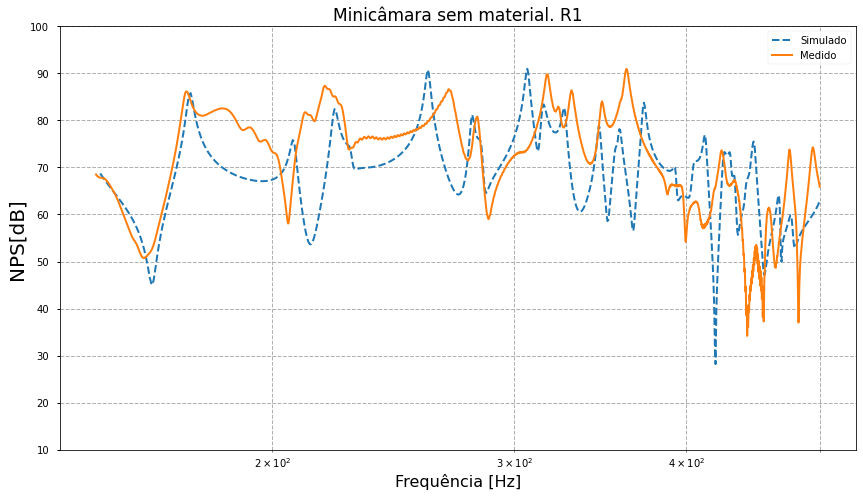

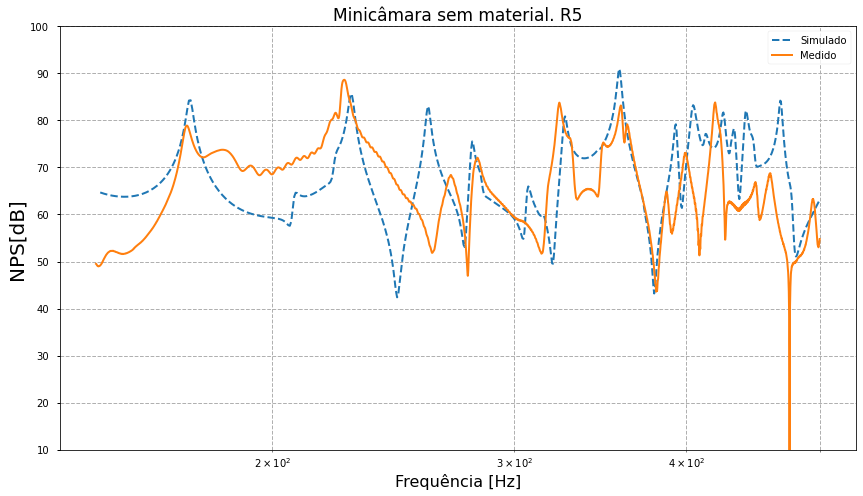

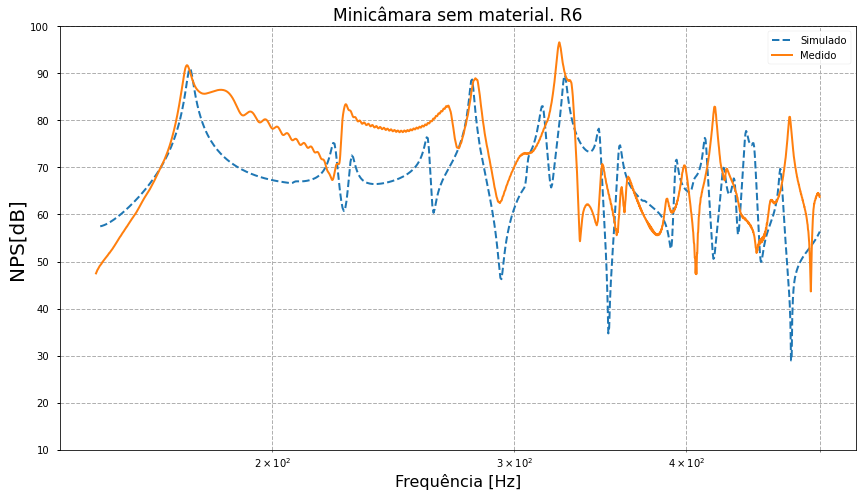

In [ ]:
for n in range(0,6):
    plt.figure(figsize=(12,7))
    plt.semilogx(AC.freq, p2SPL(obj.pR[:,n]/max(abs(obj.pR[:,n]))),label='Simulado', linestyle='--', linewidth=2)
    plt.semilogx(R_comMat['freqVector'][1981:6650,0], p2SPL(R_comMat['pts_freq'][1981:6650,n]/max(abs(R_comMat['pts_freq'][2641:6650,0]))), linestyle='-', label = 'Medido',linewidth=2)
    plt.grid(linestyle = '--', which='both')
    plt.legend(loc='best')
    plt.title(f'Minicâmara sem material. R{n+1}', fontsize=17)
    plt.xlabel('Frequência [Hz]', fontsize=16)
    plt.ylabel(r'NPS[dB]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
    plt.tight_layout()
    plt.ylim((10,100))
# plt.ylim((0,0.2))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
    plt.show()  

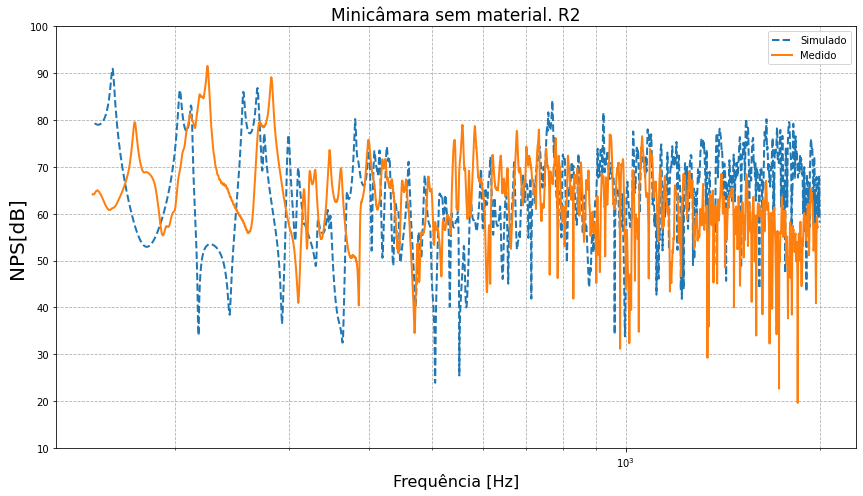

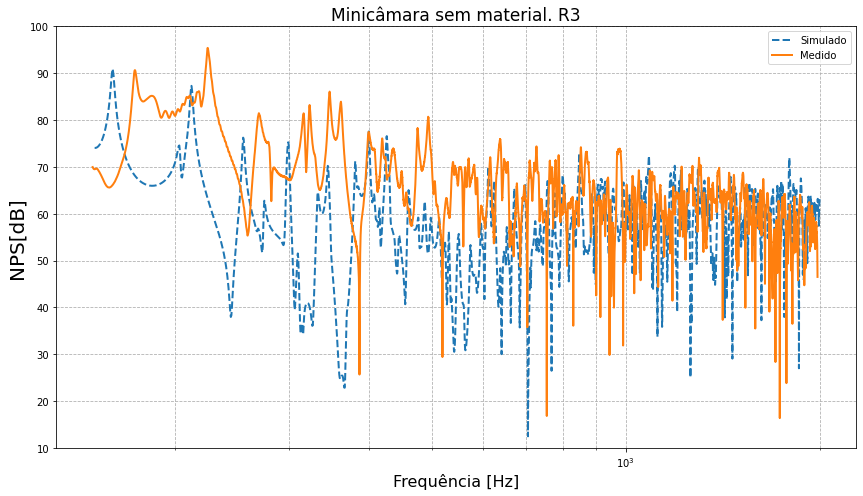

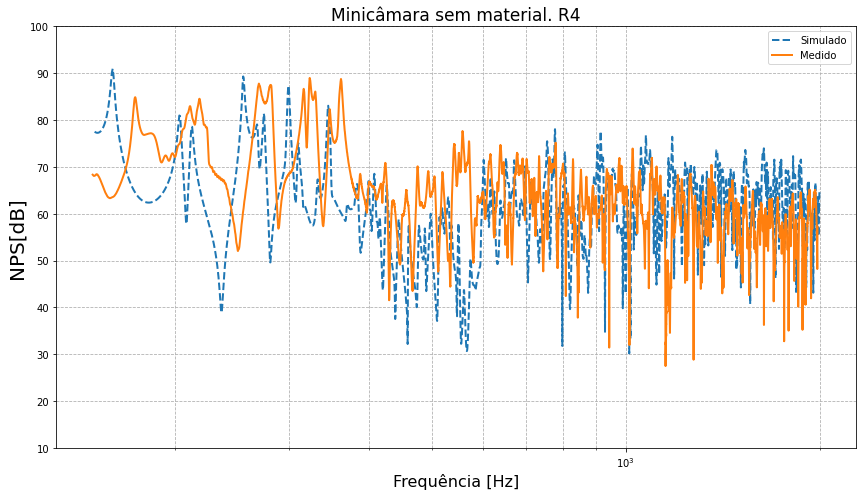

In [ ]:
#Comparação NPS dos pontos medido e simulado  
# Q - Dependente da freq

for n in range(0,6):
    plt.figure(figsize=(12,7))
    plt.semilogx(AC.freq, p2SPL(obj.pR[:,n]/max(abs(obj.pR[:,n]))),label='Simulado', linestyle='--', linewidth=2)
    plt.semilogx(R_semMat['freqVector'][1981:26401,0], p2SPL(R_semMat['pts_freq'][1981:26401,n]/max(abs(R_semMat['pts_freq'][2641:7921,0]))), linestyle='-', label = 'Medido',linewidth=2)
    plt.grid(linestyle = '--', which='both')
    plt.legend(loc='best')
    plt.title(f'Minicâmara sem material. R{n+1}', fontsize=17)
    plt.xlabel('Frequência [Hz]', fontsize=16)
    plt.ylabel(r'NPS[dB]', fontsize=20)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([200,250,315,400,500,630,800,1000,1250,1600,2000],[200,250,315,400,500,630,800,1000,1250,1600,2000])
    plt.tight_layout()
    plt.ylim((10,100))
# plt.ylim((0,0.2))
# plt.xlim((200,2000))
#plt.savefig("/content/drive/MyDrive/TCC/Documento/abs_teto.pdf")
    plt.show()  

In [ ]:
plt.title('SEM MATERIAL - média espacial')
pR_med = np.mean(obj.pR,axis=1) # R_semMat['R_semMatfreq'][2641:7921,n]
R_med = np.mean(R_semMat['pts_freq'][2641:7921],axis=1)
plt.semilogx(obj.freq, p2SPL(pR_med/max(abs(pR_med))), linestyle='--', label='Simulado', linewidth=2)
plt.semilogx(R_semMat['freqVector'][2641:7921,0], p2SPL(R_med/max(abs(R_med))), linestyle='-', label='Medido', linewidth=1)
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
# plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
#plt.ylim(40,160)
plt.tight_layout()
plt.show()

### Comparação RIs dos pontos medido e simulado

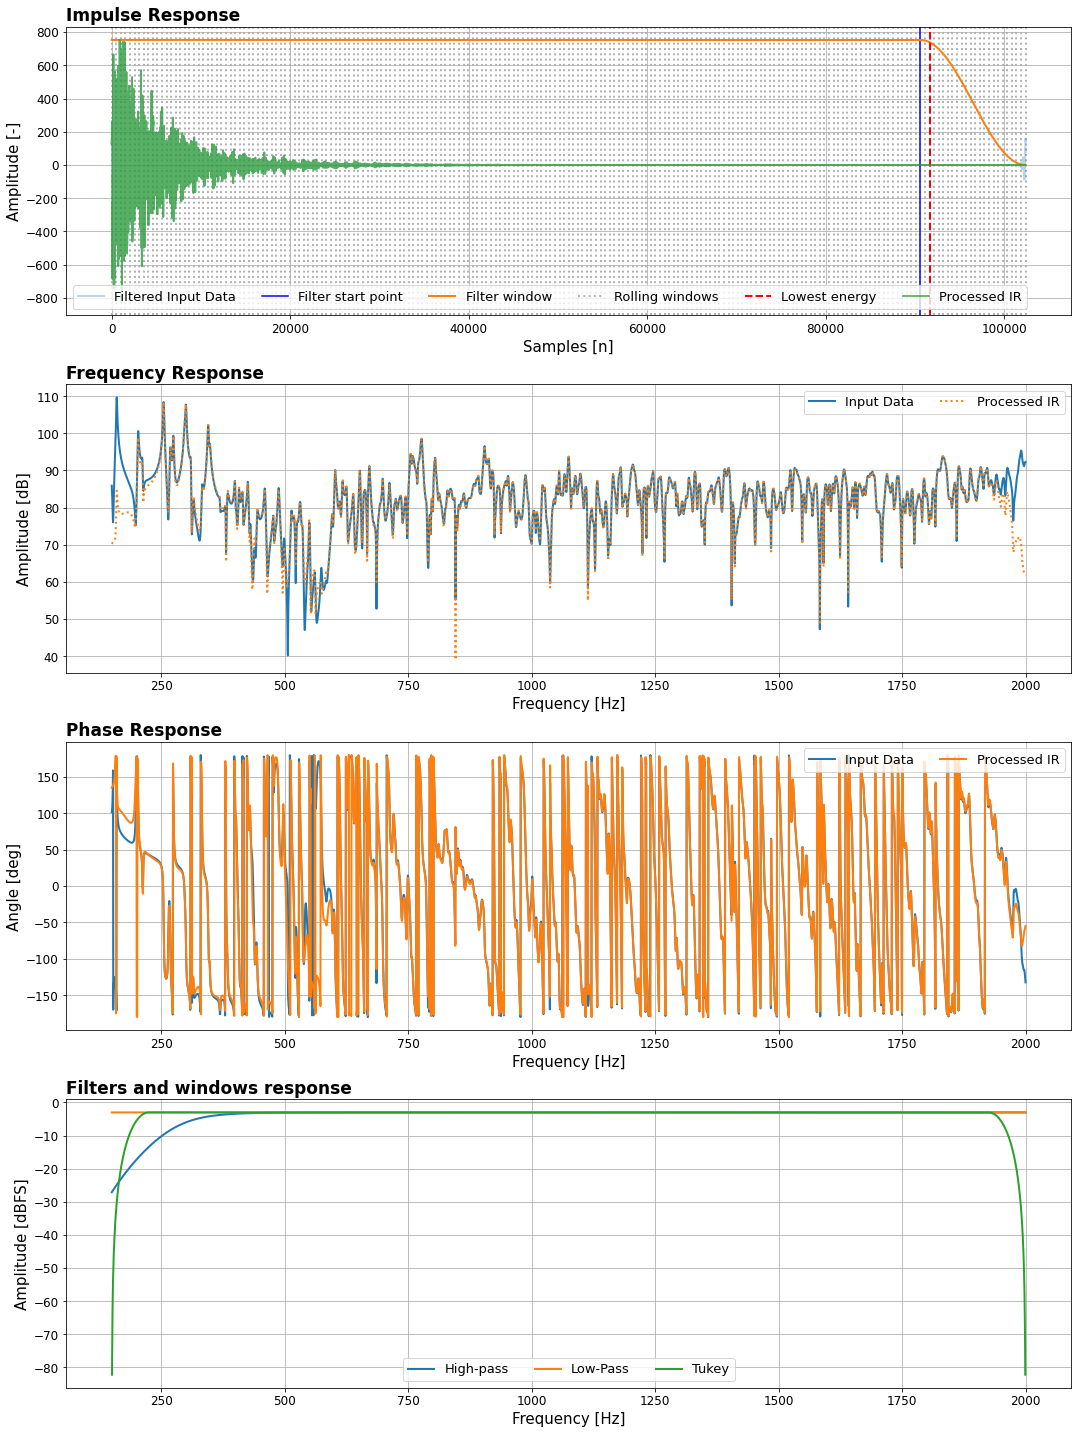

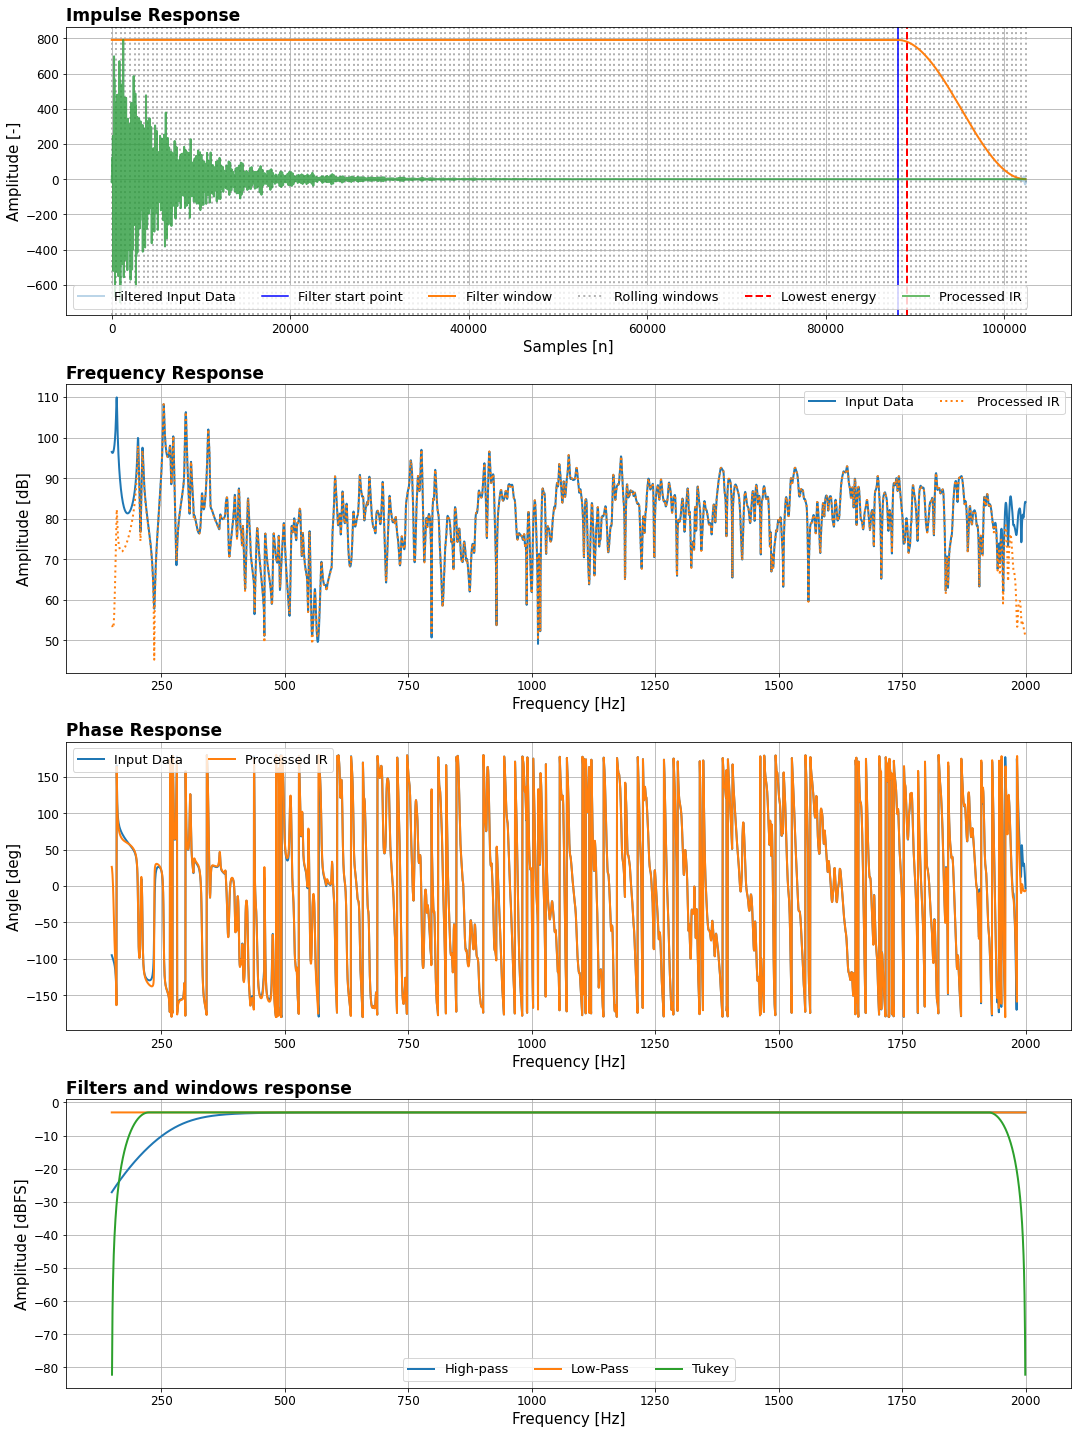

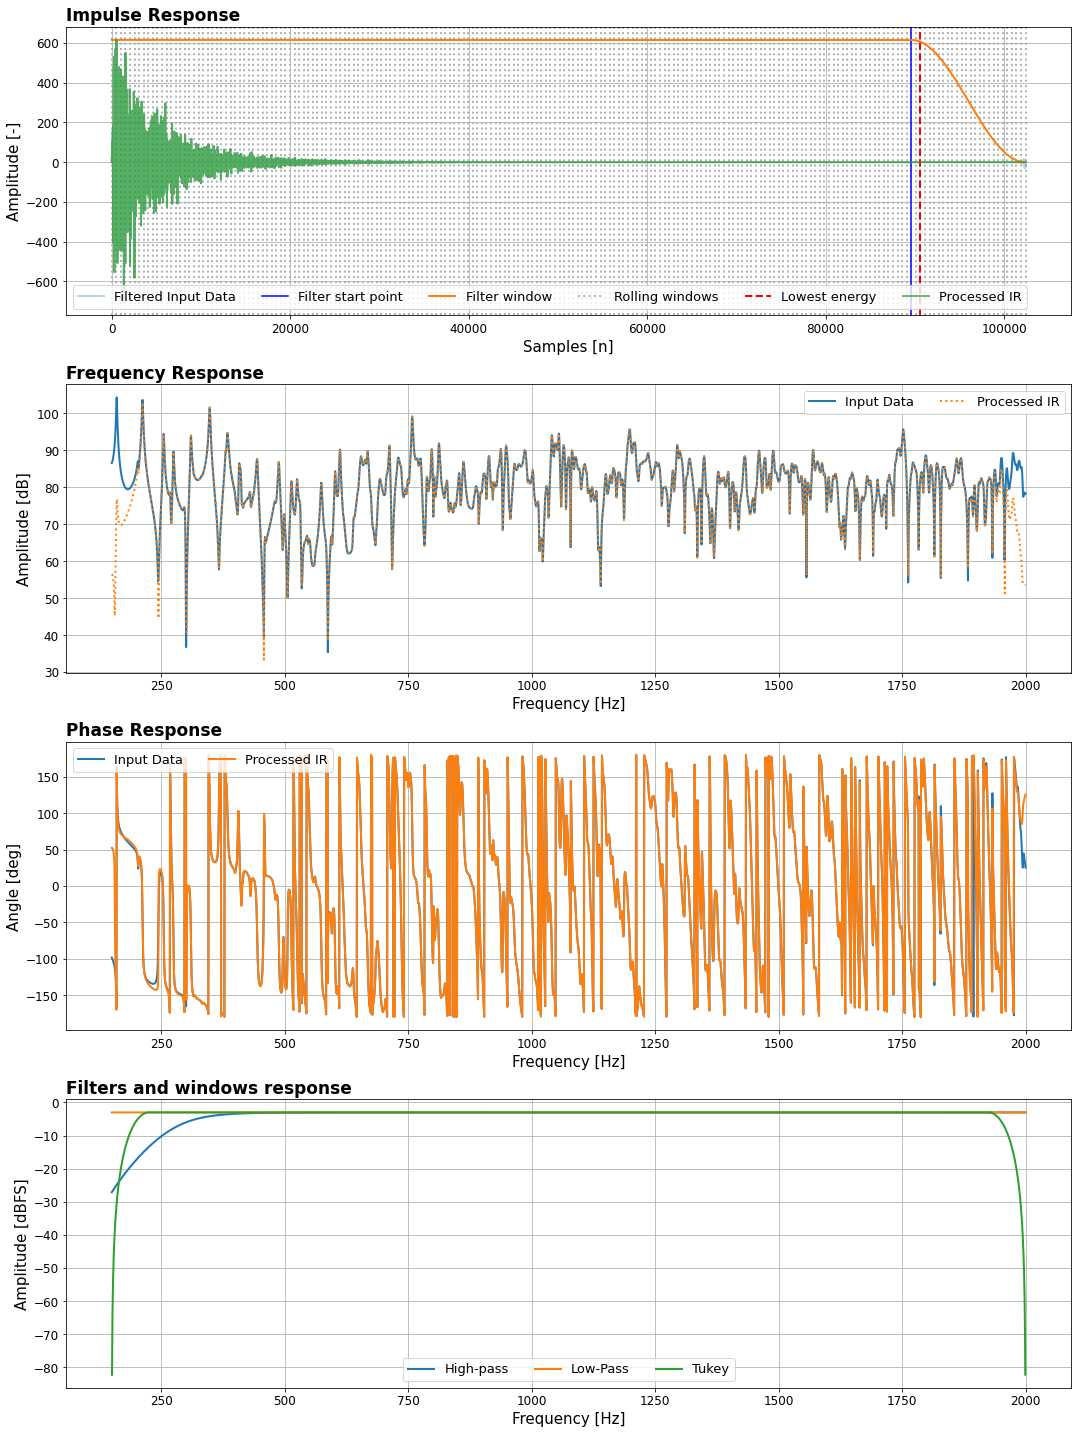

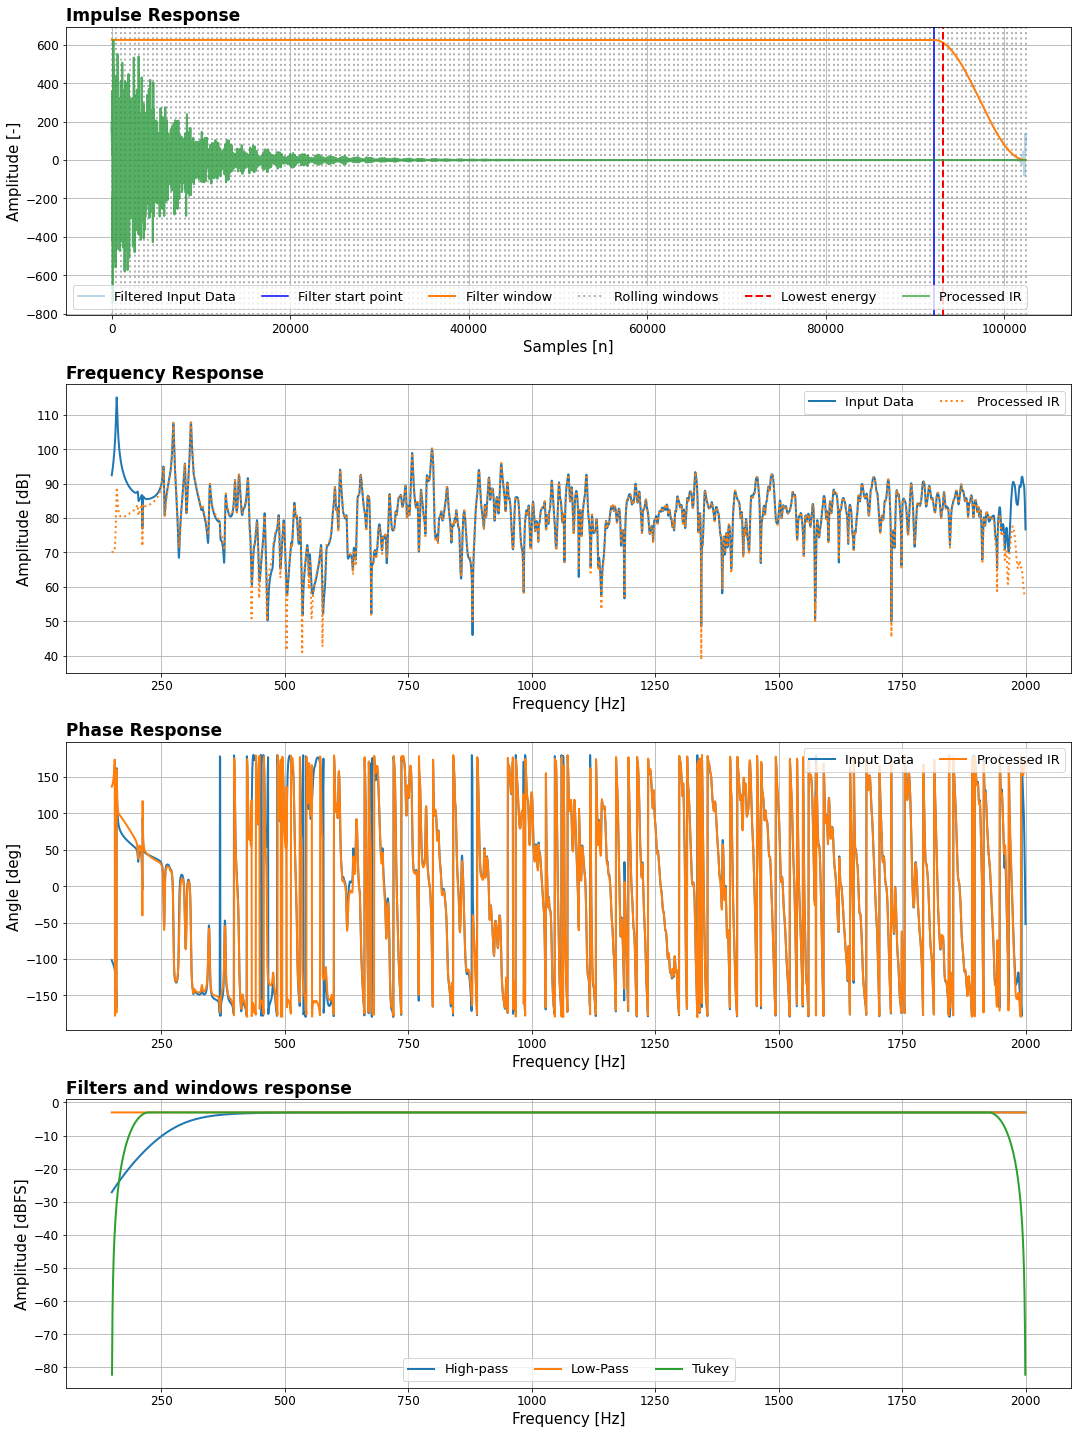

In [ ]:
#%% Resposta Impulsiva
domain = fd.Domain(fmin, fmax,2,51200)
domain.alpha = 0.1
ir = np.zeros((len(RI_semMat['RIs_sz']),len(obj.pR[0,:])))
for n in range(0,len(obj.pR[0,:])):
    ir[:,n] = domain.compute_impulse_response(obj.pR[:,n], view=True, irr_filters=False)


In [ ]:
# Salvar os dados p importar no MATLAB
from scipy.io import savemat
savemat('G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\RIs_simuladas_Zs_soparedes_pR.mat',{'RIs':ir,'freq':AC.freq})


In [ ]:

import pytta
txAmostragem = 51200 # [Hz]
# fftDegree = 19
# T = (2**fftDegree-1)/txAmostragem # [s]
# Cria vetor no tempo de um sinal aleatório
#meuRuido = np.random.randn(txAmostragem*T)
# SignalObj com sinal provido pelo usuário
RI_semMat = pytta.SignalObj(RI_semMat['RIs_sz'], 'time', txAmostragem) 
RI_semMat.plot_time_dB(yLim=[-100,30])

### Plote do campo de pressão

In [ ]:
import pickle
with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\codes\\dados-pickle\\simu_fluidoeq_1k_altares.pkl","rb") as arquivo:
  obj1 = pickle.load(arquivo)

Default Plotly renderer: jupyterlab


In [ ]:
# Plote do campo de pressão
obj1.pressure_field(frequencies = 400,renderer='browser',axis=['xy','yz'],saveFig=False,camera_angles=['diagonal_front'],extension='pdf')

G:\Meu Drive\TCC\Simulacao_computacional\codes\geo\minicamara_menor\maisEspesso_comVol.geo


100%|██████████| 174/174 [00:00<00:00, 3740.06it/s]



	Elapsed time to evaluate acoustic field: 1.30 minutes



# Juntar dados simulados


In [48]:
obj3.plot_problem(renderer='browser',saveFig=False,camera_angles=['diagonal_front'],extension='png')

In [3]:
R = fd.Receiver()
#R.coord = np.array([[0.33,0.23,0.21],[0.38,0.93,0.21],[0.92,0.95,0.21]]) 
R.coord = np.array([[1.057,0.695,0.282],[0.425,0.925,0.235],
                    [0.409,0.406,0.235],[0.336,0.677,0.282],
                    [0.685,0.965,0.235],[0.661,0.30,0.235]])

In [4]:
import pickle
with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_150_500_0_5.pkl","rb") as arquivo:
  obj1 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_500_900_0_5.pkl","rb") as arquivo:
  obj2 = pickle.load(arquivo)

with open("G:\\Meu Drive\\TCC\\Simulacao_computacional\\minicamara-90mm\\minicamara_comMat\\espessura2_5cm\\fluido_eq\\obj_900_2k_0_5.pkl","rb") as arquivo:
  obj3 = pickle.load(arquivo)


In [5]:
obj1.evaluate(R)
obj2.evaluate(R)
obj3.evaluate(R)

0.06146735586564005
0.045204728086663634
0.0722043278487039
0.07503018199563462
0.07556243970264377
0.08818875961381982
0.032082863225588926
0.03679214985534197
0.023178364151679422
0.043889702200612675
0.04616638507519399
0.03136716266217135
0.011003252556852229
0.015434250217560602
0.016673440149848655
0.014698756290176015
0.013860358015062173
0.020123143043620416


array([[ 0.28429821+0.28393747j,  0.18971987+0.01923886j,
        -0.04979776+0.06075687j, -0.22772925-0.32767509j,
        -0.19178853-0.0020273j , -0.22493558+0.10828289j],
       [ 0.35899861+0.31007825j,  0.18810608+0.00609893j,
        -0.02846198+0.05999408j, -0.27860952-0.33166402j,
        -0.2149918 +0.02803067j, -0.17912263+0.119841j  ],
       [ 0.44261717+0.31970525j,  0.18953283-0.00182107j,
        -0.00805549+0.05597795j, -0.33472658-0.32292756j,
        -0.23281192+0.06034623j, -0.13513766+0.11803469j],
       ...,
       [-0.51315855+0.31469479j, -0.57889997-0.17190084j,
         0.5417038 -0.76078509j,  0.88273614-0.3256535j ,
        -1.14424902+0.95845731j, -0.69982819+0.76961741j],
       [-0.53623056+0.30649289j, -0.61003544-0.24497173j,
         0.46810033-0.87843486j,  0.73821838-0.324028j  ,
        -0.9089645 +1.06774334j, -0.61003924+0.76075047j],
       [-0.57005735+0.31444626j, -0.68148427-0.30893744j,
         0.36685341-0.98292962j,  0.6237803 -0.26967766

In [35]:
tam = len(obj1.pR[:,0])+len(obj2.pR[1:,0])+len(obj3.pR[1:,0])
pR = np.zeros((tam,6),dtype='complex128')
pR[:len(obj1.pR[:,0]),:] += obj1.pR
pR[len(obj1.pR[:,0]):len(obj1.pR[:,0])+len(obj2.pR[1:,0]),:] += obj2.pR[1:,:]
pR[len(obj1.pR[:,0])+len(obj2.pR[1:,0]):tam,:] += obj3.pR[1:,:]

In [42]:
pR = np.concatenate((obj1.pR,obj2.pR[1:,:],obj3.pR[1:,:]))

In [45]:
obj3.freq[1:]

array([500.5, 501. , 501.5, 502. , 502.5, 503. , 503.5, 504. , 504.5,
       505. , 505.5, 506. , 506.5, 507. , 507.5, 508. , 508.5, 509. ,
       509.5, 510. , 510.5, 511. , 511.5, 512. , 512.5, 513. , 513.5,
       514. , 514.5, 515. , 515.5, 516. , 516.5, 517. , 517.5, 518. ,
       518.5, 519. , 519.5, 520. , 520.5, 521. , 521.5, 522. , 522.5,
       523. , 523.5, 524. , 524.5, 525. , 525.5, 526. , 526.5, 527. ,
       527.5, 528. , 528.5, 529. , 529.5, 530. , 530.5, 531. , 531.5,
       532. , 532.5, 533. , 533.5, 534. , 534.5, 535. , 535.5, 536. ,
       536.5, 537. , 537.5, 538. , 538.5, 539. , 539.5, 540. , 540.5,
       541. , 541.5, 542. , 542.5, 543. , 543.5, 544. , 544.5, 545. ,
       545.5, 546. , 546.5, 547. , 547.5, 548. , 548.5, 549. , 549.5,
       550. , 550.5, 551. , 551.5, 552. , 552.5, 553. , 553.5, 554. ,
       554.5, 555. , 555.5, 556. , 556.5, 557. , 557.5, 558. , 558.5,
       559. , 559.5, 560. , 560.5, 561. , 561.5, 562. , 562.5, 563. ,
       563.5, 564. ,

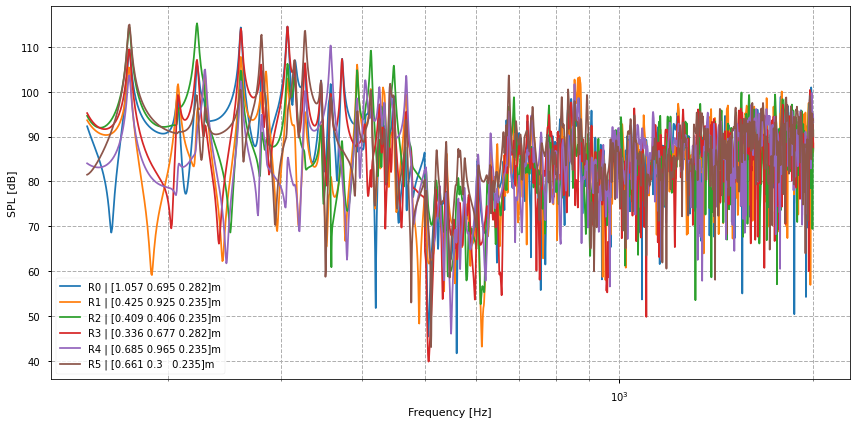

In [52]:
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,6))

if len(obj1.R.coord)==1:
  plt.semilogx(AC.freq, p2SPL(pR), linestyle='-', label=f'R | {obj1.R.coord[0]}m')
else:
  for i in range(len(obj1.R.coord)):
      plt.semilogx(AC.freq, p2SPL(pR[:,i]), linestyle='-', label=f'R{i} | {obj1.R.coord[i,:]}m')

if len(obj1.R.coord) > 1:
  pR_med = np.mean(pR,axis=1)
  #plt.semilogx(obj.freq, p2SPL(pR_med), linestyle='--', label='Average', linewidth=4)
#plt.title('SEM MATERIAL')
plt.grid(linestyle = '--', which='both')
plt.legend(loc='best')
plt.xlabel('Frequency [Hz]')
plt.ylabel('SPL [dB]')
#plt.ylim(40,160)
#plt.xticks([20,40,60,80,100,120,160,200],[20,40,60,80,100,120,160,200]);
#plt.xticks([100,125,160,200,250,315,400,500,630,1000,1250],[100,125,160,200,250,315,400,500,630,1000,1250]);
#plt.ylim((min(p2SPL(pR_med)),max(p2SPL((pR_med)))))
plt.tight_layout()
plt.show()